In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../../../../")
import utils
import os

### fet feature data

In [4]:
df = pd.read_csv('../data/features_and_metadata.csv', index_col=0)
df.head()

,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,CD35,CD2135,CD44,nucl,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cluster.termV2
0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,0.000000,...,217.914412,69.250551,0.000000,9100.068826,572.555576,Other,7.717314,240.809187,1,Vessel
1,4,7,215,0.000000,0.000000,134.472468,0.000000,1431.469046,73.665657,0.000000,...,1135.190597,96.309696,0.000000,15071.640583,0.000000,B,5.916279,1334.600000,1,Other
2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,1152.344425,...,488.606413,245.895189,236.229915,16381.046106,769.252953,Other,9.277078,1167.989924,1,Vessel
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,0.000000,0.000000,942.795851,2283.347509,312.484433,B,11.430000,1026.952000,1,B
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,1822.097852,392.223150,5141.479714,23181.488067,575.791169,Mph,10.233890,656.547733,1,Mph


In [6]:
features_names = [
        'CD45',
        'Ly6C',
        'TCR',
        'Ly6G',
        'CD19',
        'CD169',
        'CD106',
        'CD3',
        'CD1632',
        'CD8a',
        'CD90',
        'F480',
        'CD11c',
        'Ter119',
        'CD11b',
        'IgD',
        'CD27',
        'CD5',
        'CD79b',
        'CD71',
        'CD31',
        'CD4',
        'IgM',
        'B220',
        'ERTR7',
        'MHCII',
        'CD35',
        'CD2135',
        'CD44',
        'nucl',
        'NKp46'
    ]
features = df[features_names].to_numpy()
features = utils.center_scale(features)

In [13]:
features.shape

(53500, 31)

### read nbhd information

In [17]:
nbhd_compo = np.load('../data/cell_nbhd_res0.5_k20_0325.npy')
nbhd_compo  = utils.center_scale(nbhd_compo)
nbhd_compo.shape

(53500, 15)

In [20]:
# start cca
cca = CCA(scale=False, n_components=15)
cca.fit(features, nbhd_compo)

CCA(n_components=15, scale=False)

In [21]:
X1_c, X2_c = cca.transform(features, nbhd_compo)

In [22]:
X1_c.shape

(53500, 15)

In [24]:
X1_c

array([[-4.48978265e-01, -8.91518520e-01, -1.71823595e-01, ...,
        -1.31996720e+00,  1.19727505e-01,  2.47501942e-02],
       [-8.09312512e-01, -1.46482991e+00,  9.74646176e-01, ...,
        -6.77807498e-03,  1.16768192e+00, -1.54565463e-02],
       [-5.26592753e-01, -1.45205956e+00, -5.65537105e-01, ...,
        -1.26629286e+00,  6.93203832e-01,  5.81444128e-02],
       ...,
       [-8.07451421e-01, -2.66724681e+00, -4.24450037e-02, ...,
         1.82067581e-01,  8.22108053e-02,  1.63108089e-02],
       [-5.11733748e-01, -1.77355586e+00,  3.30112036e-01, ...,
        -2.17546408e-01,  2.19516811e-01,  5.11213235e-03],
       [-2.70017962e-01, -1.38597046e+00, -7.61263234e-02, ...,
         1.47566868e-01,  3.69277353e-02,  2.14094430e-03]])

In [23]:
X2_c.shape

(53500, 15)

In [25]:
pd.DataFrame(X1_c).to_csv('../data/cca15_feat.csv', index=False)

### quick check if the cca made any sense

In [26]:
import anndata as ad
import scanpy as sc
import scipy
import matplotlib.patches as mpatches

In [27]:
adata = ad.AnnData(X1_c)
sc.pp.scale(adata)
adata.obs['annotation'] = list(df['cluster.termV2'])
sc.tl.pca(adata, svd_solver='arpack')
# sc.pp.neighbors(feature_adata, n_neighbors=10, n_pcs=40)

/tmp/ipykernel_1946865/1081110006.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X1_c)


/home/bokai/miniconda3/envs/cellsnap/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bokai/miniconda3/envs/cellsnap/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/bokai/miniconda3/envs/cellsnap/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'annotation'}, xlabel='UMAP1', ylabel='UMAP2'>

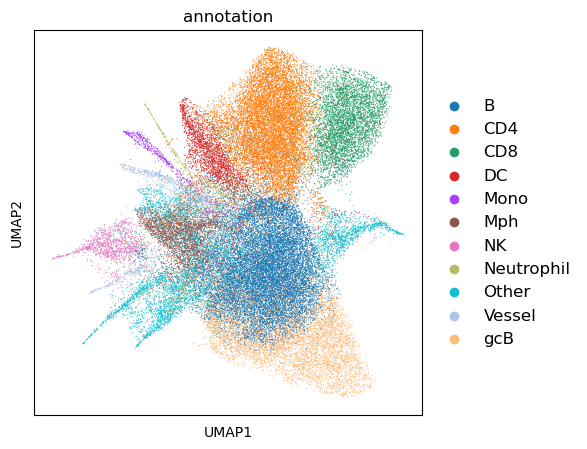

In [28]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5,5)
sc.pl.umap(adata, color='annotation', legend_fontsize=12, show=False)